In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [3]:
# listing the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [5]:
df['negativereason'] = df['negativereason'].apply(lambda x: np.random.choice(df['negativereason'].dropna()) if pd.isna(x) else x)
df['negativereason'].head(10)

,negativereason
0,Customer Service Issue
1,Flight Attendant Complaints
2,Can't Tell
3,Bad Flight
4,Can't Tell
5,Can't Tell
6,Late Flight
7,Bad Flight
8,Lost Luggage
9,Flight Booking Problems


In [6]:
df['negativereason_confidence'] = df['negativereason_confidence'].apply(lambda x: np.random.choice(df['negativereason_confidence'].dropna()) if pd.isna(x) else x)
df['airline_sentiment_gold'] = df['airline_sentiment_gold'].apply(lambda x: np.random.choice(df['airline_sentiment_gold'].dropna()) if pd.isna(x) else x)
df['negativereason_gold'] = df['negativereason_gold'].apply(lambda x: np.random.choice(df['negativereason_gold'].dropna()) if pd.isna(x) else x)
df['tweet_coord'] = df['tweet_coord'].apply(lambda x: np.random.choice(df['tweet_coord'].dropna()) if pd.isna(x) else x)
df['tweet_location'] = df['tweet_location'].apply(lambda x: np.random.choice(df['tweet_location'].dropna()) if pd.isna(x) else x)
df['user_timezone'] = df['user_timezone'].apply(lambda x: np.random.choice(df['user_timezone'].dropna()) if pd.isna(x) else x)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     14640 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        14640 non-null  object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           14640 non-null  object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   14640 non-null  object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,Customer Service Issue,1.0000,Virgin America,positive,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[35.22534456, -106.57241352]",24/02/2015 11:35,"Boston, MA",Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,Flight Attendant Complaints,0.0000,Virgin America,negative,jnardino,Bad Flight,0,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",24/02/2015 11:15,Toronto,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,Can't Tell,0.6656,Virgin America,negative,yvonnalynn,Late Flight\nLost Luggage,0,@VirginAmerica I didn't today... Must mean I n...,"[33.9424793, -118.4066936]",24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Late Flight,0,@VirginAmerica it's really aggressive to blast...,"[25.79939784, -80.27038889]",24/02/2015 11:15,South,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,neutral,jnardino,Can't Tell,0,@VirginAmerica and it's a really big bad thing...,"[39.29275067, -94.70795218]",24/02/2015 11:14,"Denver, CO. USA",Pacific Time (US & Canada)


## Q1

columns which will be usefull for sentiment analysis are
airline_sentiment,airline_sentiment_confidence,negativereason,airline, airline_sentiment_gold,negativereason_gold,text,	tweet_created,tweet_location

##Q2:-There are three sentiment positive, negative & neutral. What is the average count of each sentiment?


In [9]:
# avaerage count airline sentiment by positive negative and neautral
sentiment_count = df['airline_sentiment'].value_counts()
sentiment_count

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


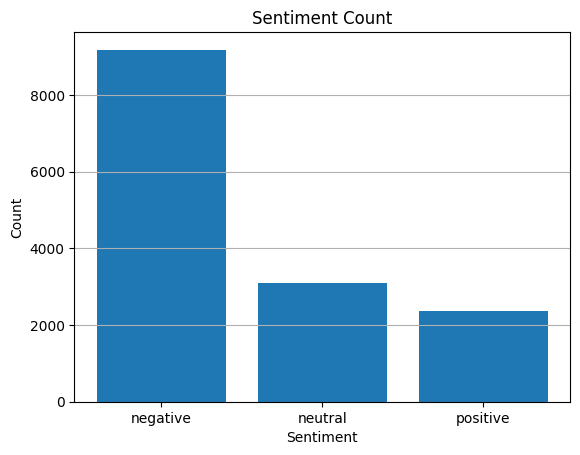

In [10]:
plt.bar(sentiment_count.index,sentiment_count.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')


plt.grid(axis='y')
plt.show()

##Q3:-What are some of thecommon negative feedbacks given?

In [11]:
negative_feedback = df[df['airline_sentiment'] == 'negative']
negative_reason_counts = negative_feedback['negativereason'].value_counts()
print(negative_reason_counts)

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


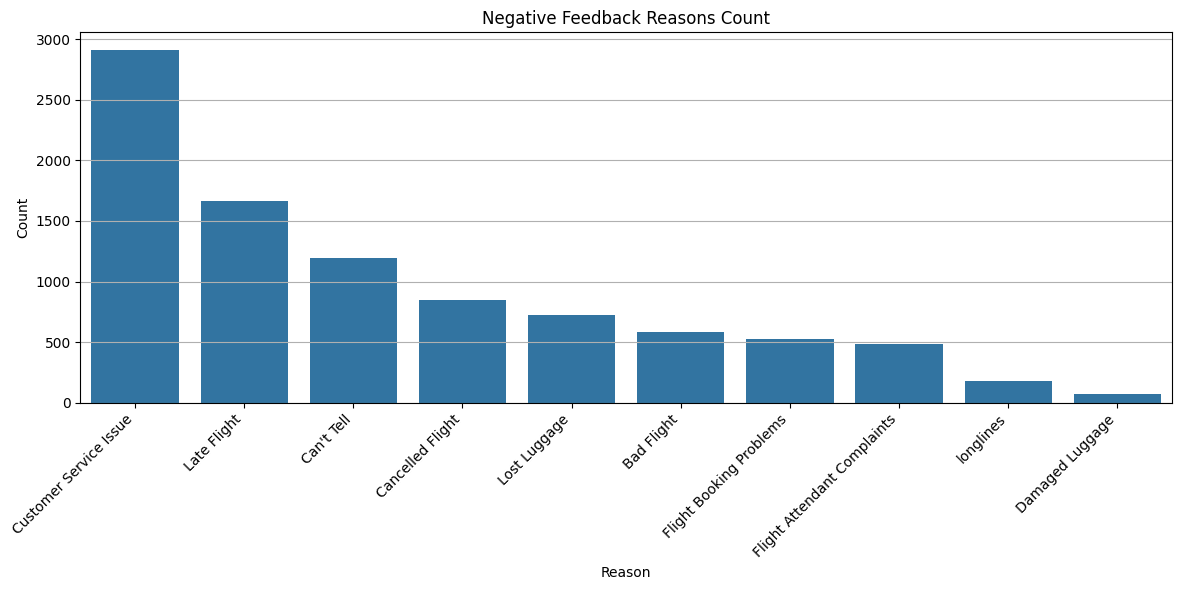

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=negative_reason_counts.index, y=negative_reason_counts.values)
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Negative Feedback Reasons Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.grid(axis='y')
plt.show()

##Q4:-How many different airlines are present in the dataset?

In [14]:
airline_count = df['airline'].unique()
airline_count

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [18]:
flight_counts = df['airline'].value_counts()
print(flight_counts)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


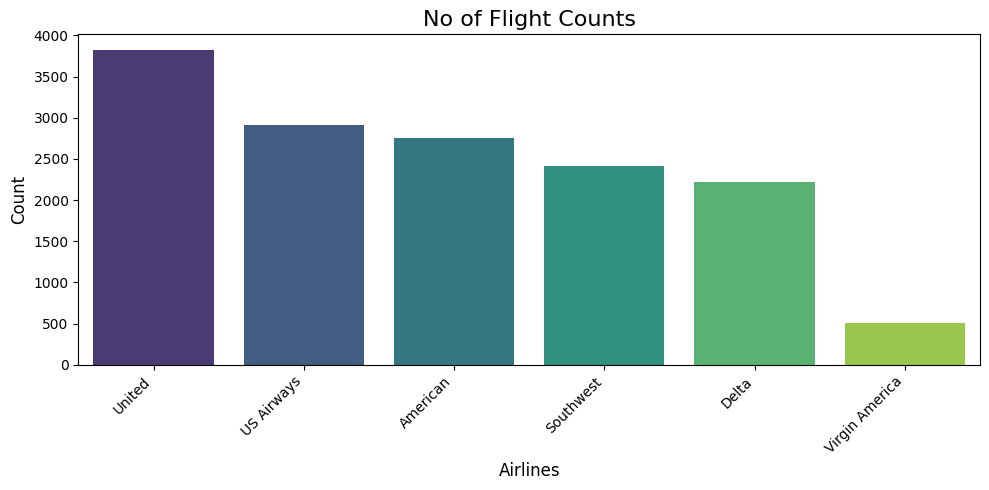

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=flight_counts.index, y=flight_counts.values, palette="viridis")
plt.title('No of Flight Counts', fontsize=16)
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##Q5:-Could you generate the no. of sentiments of each airline from the data?

In [36]:
senti_count = df.groupby(['airline', 'airline_sentiment']).size().unstack()
senti_count



airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


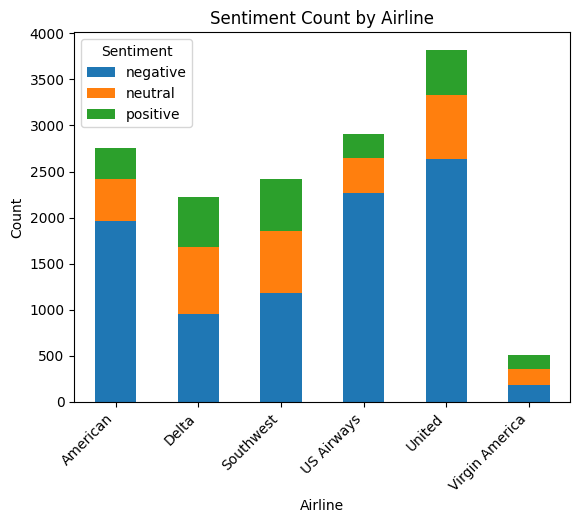

In [16]:
senti_count.plot(kind='bar', stacked=True)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Count by Airline')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha="right")
plt.show()

##Q6. airline has the maximum negative sentiments

In [22]:
# airline having max number of negativesentiment
neg_sentiment = df[df['airline_sentiment'] == 'negative']
neg_counts = neg_sentiment.groupby('airline').size()
max_neg_airline = neg_counts.idxmax()
max_neg_count = neg_counts.max()

print(max_neg_airline,max_neg_count)

United 2633


##Q7.The most common negative feedback given

In [37]:
negative_feedback = df[df['airline_sentiment'] == 'negative']
negative_reason_counts = negative_feedback['negativereason'].value_counts()
print(negative_reason_counts.head(1))

negativereason
Customer Service Issue    2910
Name: count, dtype: int64


##Q8:-From your analysis, which airline do you feel is doing the best?

<Axes: ylabel='count'>

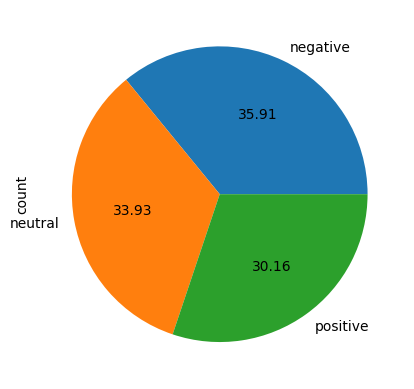

In [38]:
df[df['airline'] == 'Virgin America']['airline_sentiment'].value_counts().plot(kind = 'pie',autopct = '%.2f')

##Q9:-Is there a specific day where a lot of negative feedbacks were given?

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
negative_sentiments = df[df['airline_sentiment'] == 'negative']
negative_by_day = negative_sentiments.groupby(negative_sentiments['tweet_created'].dt.date).size()
max_negative_day = negative_by_day.idxmax()
max_negative_count = negative_by_day.max()
print(max_negative_day ,max_negative_count)